In [1]:
# Import Modules/Libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

%matplotlib inline
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

np.random.seed(1)

import warnings
#suppress warnings with numpy for sigmoid function
warnings.filterwarnings('ignore')

# Data Analysis

In [2]:
# Load datasets
train = pd.read_csv('../datasets/dataset_train.csv')
test = pd.read_csv('../datasets/dataset_test.csv')

In [3]:
def get_count(column):
    return len(column.dropna())

def get_mean(column):
    m = get_count(column)
    col = column.dropna().to_numpy()
    return col.sum() / m

def get_std(column):
    m = get_count(column)
    mean = get_mean(column)
    col = column.dropna().to_numpy()
    dof = 1 #degree of freedom
    return math.sqrt( ((col - mean)**2).sum() / (m - dof))

def get_percentiles(column):
    m = get_count(column)
    col = column.dropna().to_numpy()
    col.sort()
    _min = col[0]
    _max = col[-1]
    
    first_quartile = my_percentile(col, m, 25)
    second_quartile = my_percentile(col, m, 50)
    third_quartile = my_percentile(col, m, 75)
    return _min, _max, first_quartile, second_quartile, third_quartile

def my_percentile(col, m, percentile):
    p = m * percentile / 100
    if p.is_integer():
        return col[int(p)]
    else:
        return col[int(math.ceil(p)) - 1]

In [4]:
# df = train.select_dtypes(include=[np.number])
# for col in df.columns:
#     print(df[col].name)
#     tmp = df[col]
#     print(f"count = {get_count(tmp)}")
#     print(f"mean = {get_mean(tmp):8.6f}")
#     print(f"std = {get_std(tmp):8.6f}")
#     _min, _max, first_quartile, second_quartile, third_quartile = get_percentiles(tmp)
#     print(f"min = {_min:8.6f}")
#     print(f"first_quartile = {first_quartile:8.6f}")
#     print(f"second_quartile = {second_quartile:8.6f}")
#     print(f"third_quartile = {third_quartile:8.6f}")
#     print(f"max = {_max:8.6f}")
    

In [5]:
def describe(df):
    df = df.select_dtypes(include=[np.number])
    metrics = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
    describe_df = pd.DataFrame(0, index=np.arange(len(metrics)), columns=df.columns)
    describe_df.index = metrics
    for col_name in df.columns:
        col = describe_df[col_name]
        values = df[col_name]
        col[0] = get_count(values)
        col[1] = get_mean(values)
        col[2] = get_std(df[col_name])
        _min, _max, first_quartile, second_quartile, third_quartile = get_percentiles(df[col_name])
        col[3] = _min
        col[4] = first_quartile
        col[5] = second_quartile
        col[6] = third_quartile
        col[7] = _max
    
    return describe_df

In [177]:
df = train
describe_df = describe(df)

In [178]:
describe_df

,Index,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
count,1600.00000,1566.000000,1568.000000,1567.000000,1569.000000,1561.000000,1565.000000,1565.000000,1557.000000,1566.000000,1570.000000,1560.000000,1600.000000,1600.000000
mean,799.50000,49634.570243,39.797131,1.141020,-0.387863,3.153910,-224.589915,495.747970,2.963095,1030.096946,5.950373,-0.053427,-243.374409,21.958012
std,462.02453,16679.806036,520.298268,5.219682,5.212794,4.155301,486.344840,106.285165,4.425775,44.125116,3.147854,0.971457,8.783640,97.631602
min,0.00000,-24370.000000,-966.740546,-10.295663,-10.162119,-8.727000,-1086.496835,283.869609,-8.858993,906.627320,-4.697484,-3.313676,-261.048920,-181.470000
25%,400.00000,38510.000000,-489.493777,-4.312118,-5.259095,3.099000,-577.580096,397.511047,2.218653,1026.171713,3.644900,-0.670996,-250.647270,-41.840000
50%,800.00000,49018.000000,261.644731,3.469012,-2.589342,4.624000,-419.164294,463.918305,4.378176,1045.533335,5.877582,-0.043296,-244.867510,-2.510000
75%,1200.00000,60828.000000,525.909540,5.421046,4.904680,5.667000,254.994857,597.492230,5.825242,1058.445388,8.248789,0.594446,-232.536750,50.890000
max,1599.00000,104956.000000,1016.211940,11.612895,9.667405,10.032000,1092.388611,745.396220,11.889713,1098.958201,13.536762,3.056546,-225.428140,279.070000


## Save it

In [8]:
import os
os.makedirs('../datasets/describe', exist_ok=True)
describe_df.to_csv('../datasets/describe/train_describe.csv')

# Data Visualization

## Histogram

In [101]:
houses = ['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin']
colors = ['Blue', 'Red', 'Green', 'Yellow']

In [102]:
def histogram(data, courses, houses, colors):
    # removing index
#     courses = data.features[1:]

    plt.figure(figsize=(30, 15))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle("Score distribution by class", fontsize=18, y=0.95)

    n = 0
    for course in courses:
        ax = plt.subplot(4, 4, n + 1)
        n += 1
        for house, color in zip(houses, colors):
            marks = data.loc[data['Hogwarts House'] == house][course]
            ax.hist(marks, color=color, alpha=0.5)
            ax.set_title(course)
    plt.show()
    

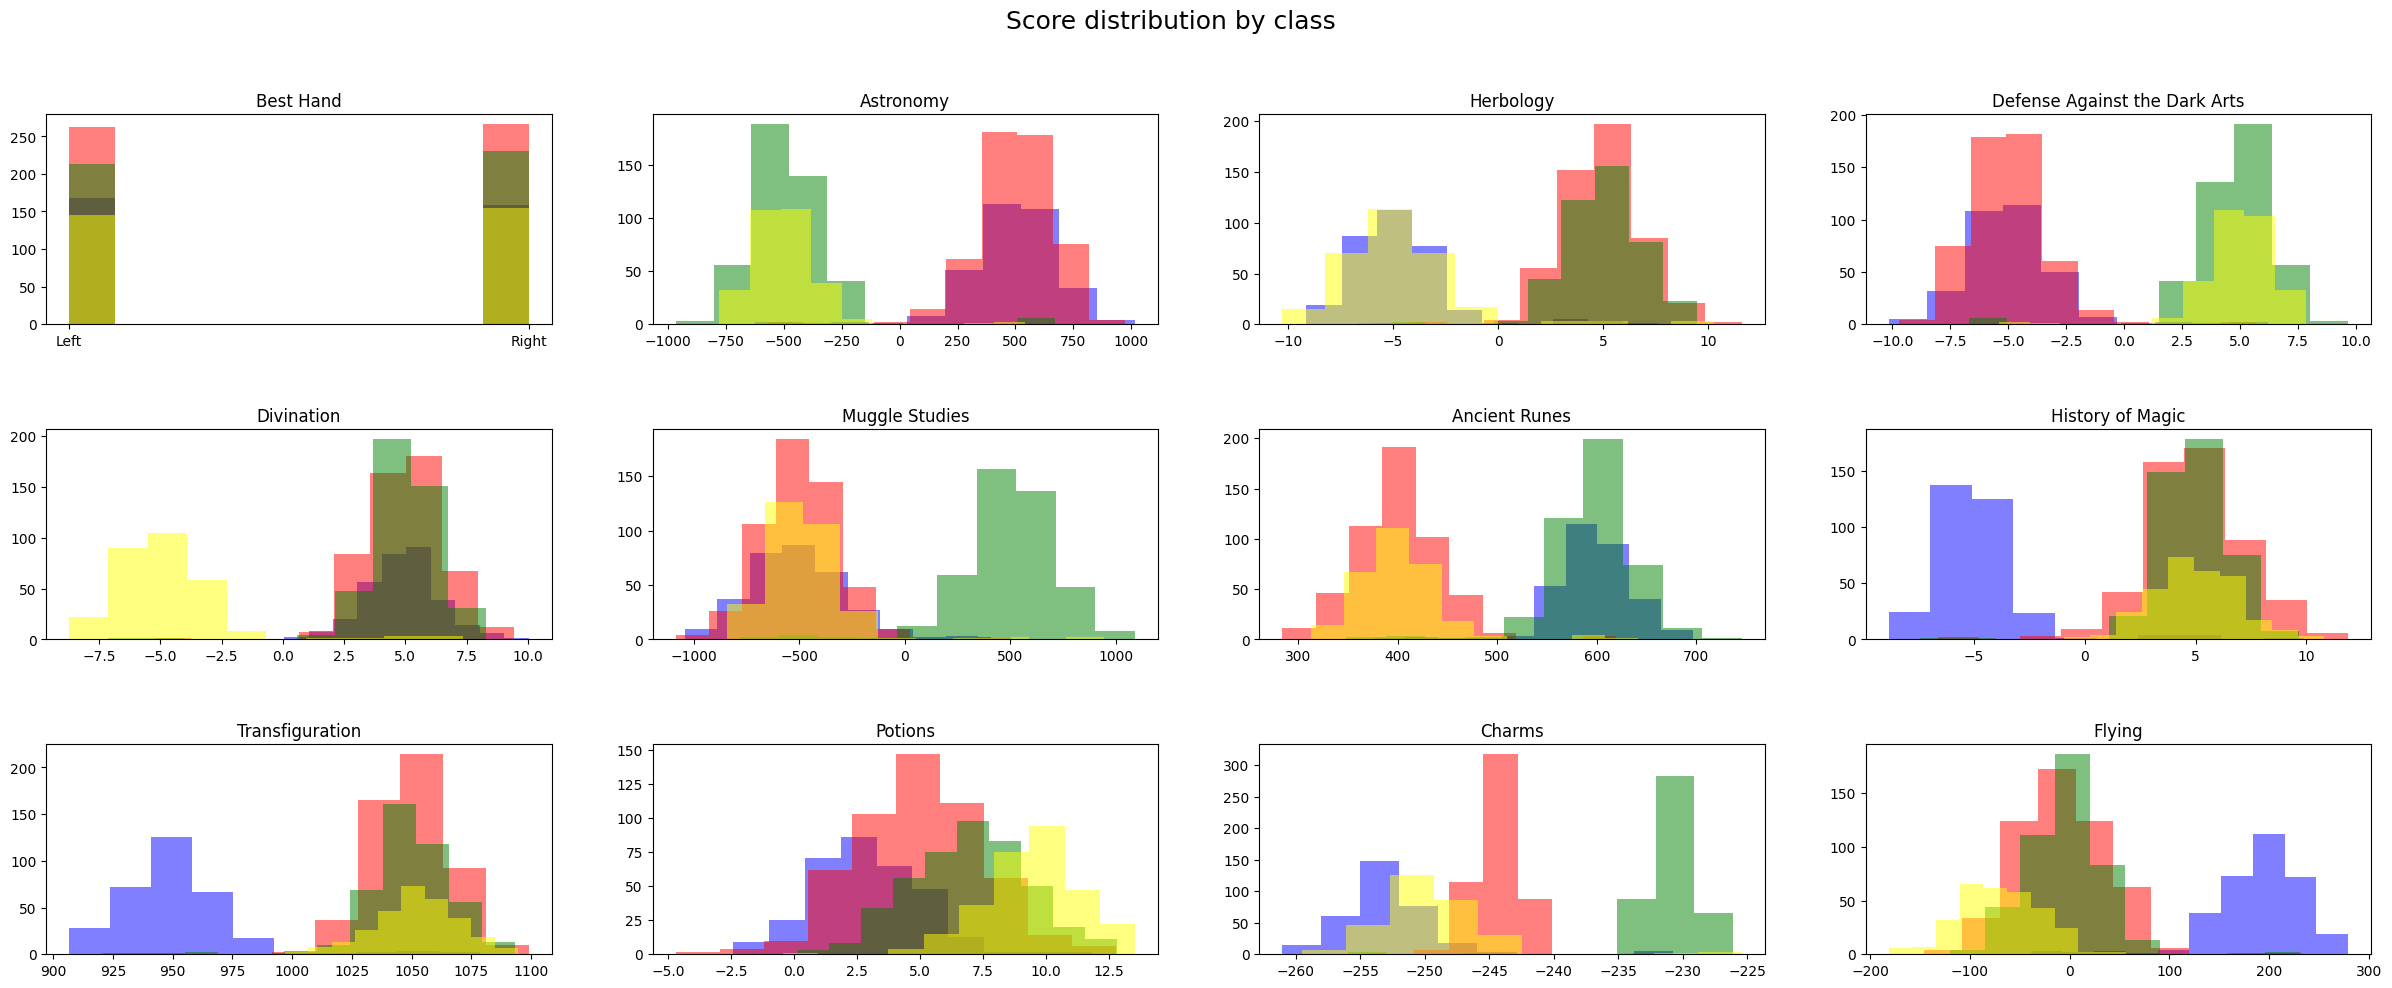

In [103]:
courses = ['Best Hand', 'Astronomy', 'Herbology', 'Defense Against the Dark Arts', 'Divination', 'Muggle Studies',
       'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions', 'Charms', 'Flying']
histogram(df, courses, houses, colors)

## Scatter plot

## Pair plot

In [10]:
# plt.figure(figsize=(30, 15))
# plt.subplots_adjust(hspace=0.5)
# plt.suptitle("Score distribution by class", fontsize=18, y=0.95)

# n = 0
# for course in courses:
#     ax = plt.subplot(4,4, n + 1)
#     n += 1
#     for house, color in zip(houses, colors):
#         marks = df.loc[df['Hogwarts House'] == house][course]
#         ax.hist(marks, color=color, alpha=0.5)
#         ax.set_title(course)
# plt.show()

In [11]:
# df = df.select_dtypes(include=[np.number])

In [81]:
def pair_plot(df):
    
    plt.figure(figsize=(30, 15))
    plt.subplots_adjust(hspace=0.8)
    plt.suptitle("Pair plot", fontsize=18, y=0.95)
    
    courses = [f for f in list(df.columns) if np.issubdtype(df[f].dtype, np.number)][1:]
    n = 0
    for index_x, course_x in enumerate(courses):
        for index_y, course_y in enumerate(courses):
            ax = plt.subplot(13, 13, n + 1)
            n += 1
            
            # col name
            ax.set_title(course_y)
            
            # row name (only when index_x = 0) # WIP not working
#             if index_x == 0:
#                 ax.set_ylabel(course_x, rotation=0, size='large')
            
            # hist
            if course_x == course_y:
                for house, color in zip(houses, colors):
                    marks = df.loc[df['Hogwarts House'] == house][course_x]
                    ax.hist(marks, color=color, alpha=0.5)

            else:
                for house, color in zip(houses, colors):
                    x = df.loc[df['Hogwarts House'] == house][course_x]
                    y = df.loc[df['Hogwarts House'] == house][course_y]
                    plt.scatter(x, y, color=color, alpha=0.5, s=2)

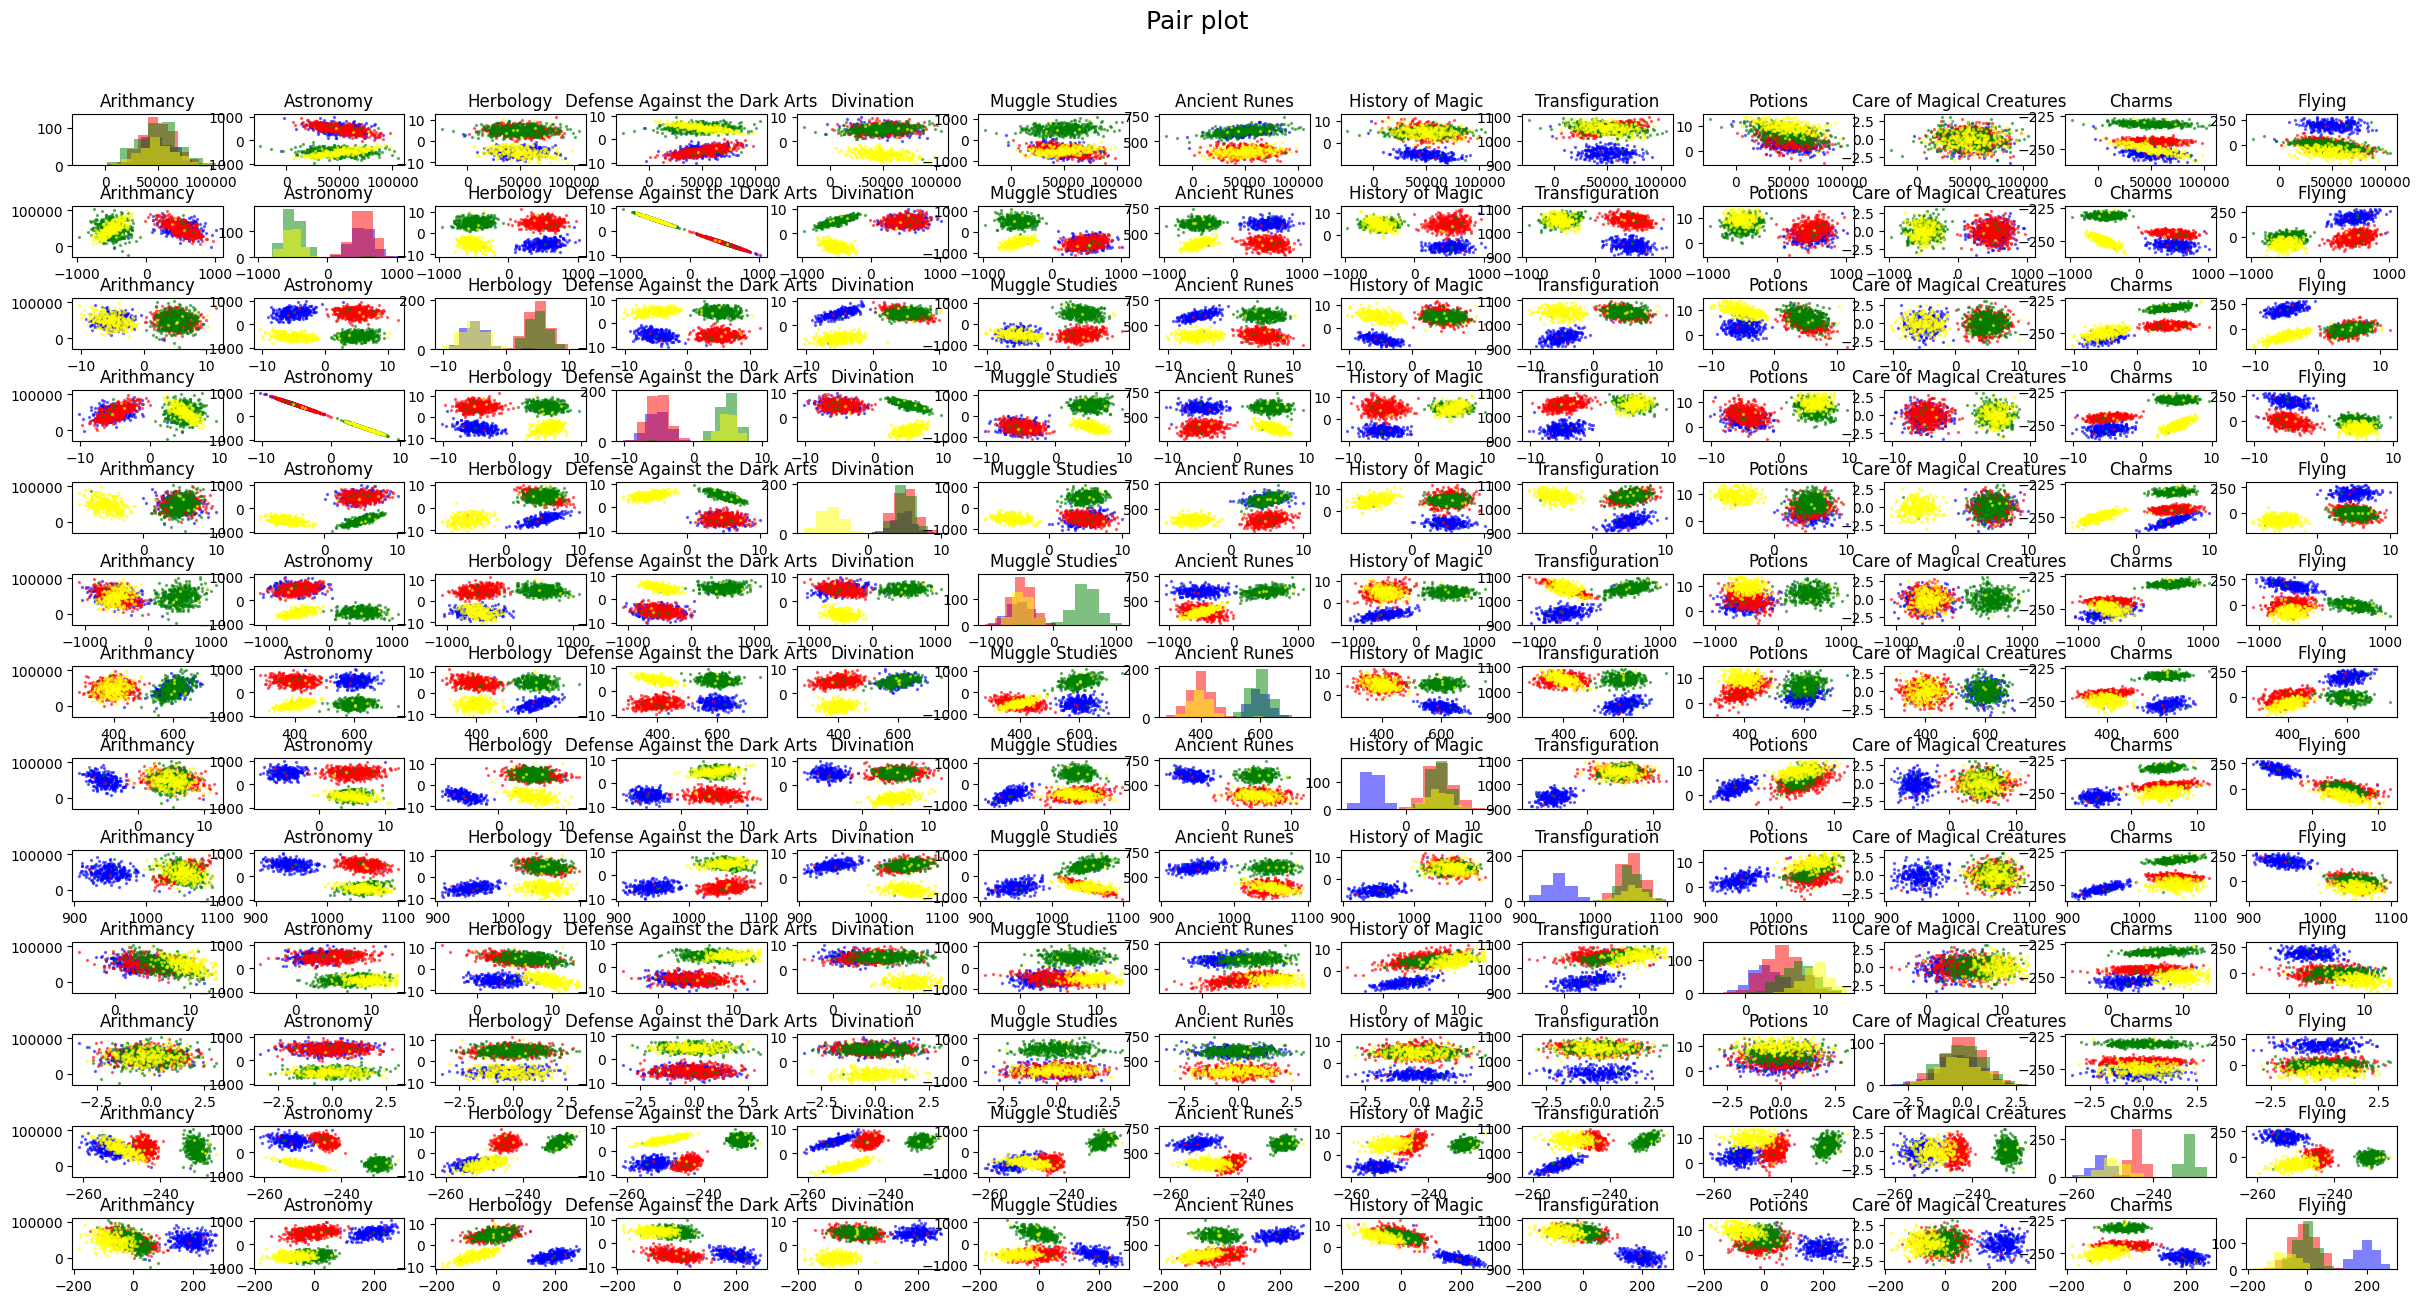

In [82]:
# pair_plot(df)

# for ax, col in zip(axes[0], cols):
#     ax.set_title(col)

# for ax, row in zip(axes[:,0], rows):
#     ax.set_ylabel(row, rotation=0, size='large')

## Observation
'Defense Against the Dark Arts' has a complete linearity with 'Astronomy', and the histogram shows that they are almost identical (with the sign reversed). We can then drop one of them

# Clean Dataset

In [189]:
# We start by dropping columns that are most likely not relevant to our target value (from our intuition)
columns_to_drop = ['Index', 'First Name', 'Last Name', 'Birthday']

# The pair plot we saw before showed us that some variables have a histogram with almost
# all similar traits within the same House. We will drop them.
columns_to_drop.extend(['Arithmancy', 'Care of Magical Creatures', 'Defense Against the Dark Arts', 'Best Hand'])


df_train = df.drop(columns = columns_to_drop)
column_names = list(df_train.columns.values)
print(f"List of Columns we are goinf to use:\n", column_names)

List of Columns we are goinf to use:
 ['Hogwarts House', 'Astronomy', 'Herbology', 'Divination', 'Muggle Studies', 'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions', 'Charms', 'Flying']


## Transformation
### Transfor target values (string to number of category)

In [190]:
# Transform string values (Houses) to category
df_train = pd.concat([df_train, pd.get_dummies(df_train['Hogwarts House'])], axis=1)
df_train = df_train.drop(columns = 'Hogwarts House')

### Transform Binary column ( Left or Right string in this example) (Not used anymore, but kept for example)

In [191]:
# df_train['Best Hand'] = (df_train['Best Hand'] == "Left").astype(int)

### Missing data
We have to take care of missing data in the dataframe. One simple method  would be to delete rows with missing values, but that would reduce the dataset to 1251 rows (349 rows yeeted is almost 30% of the dataset...).

In [192]:
df_train.dropna().shape[0]

1333

In order to preserve the whole dataset, we are going to replace the missing entries by their column average value.

In [193]:
df_train_clean = df_train.fillna(df_train.mean())
print(f"Number of missing values: ", df_train_clean.isna().sum().sum())

Number of missing values:  0


### Apply Normalization

Just like in liear regression, we are going to normalize all data to ease the training process of our model

In [194]:
def normalize(x, mean, std):
    """
    x: np array of feature X
    """
    return (x - mean) / std

In [195]:
df_train_clean

,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying,Gryffindor,Hufflepuff,Ravenclaw,Slytherin
0,-487.886086,5.727180,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,-232.79405,-26.89,0,0,1,0
1,-552.060507,-5.987446,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,-252.18425,-113.45,0,0,0,1
2,-366.076117,7.725017,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-227.34265,30.42,0,0,1,0
3,697.742809,-6.497214,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-256.84675,200.64,1,0,0,0
4,436.775204,-7.820623,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-256.38730,157.98,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,354.280086,-4.541837,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-250.39401,185.83,1,0,0,0
1596,367.531174,6.061064,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-246.42719,44.80,0,0,0,1
1597,544.018925,-3.203269,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,-251.63679,198.47,1,0,0,0
1598,453.676219,3.442831,6.738,-831.741123,383.444937,3.813111,1087.949205,3.904100,-246.19072,-76.81,0,1,0,0


In [196]:
# we normalize using the mean and std obtained from our previous analysis.
for col in column_names[1:]:
    mean = describe_df[col]['mean']
    std = describe_df[col]['std']
    
    df_train_clean[col] = normalize(df_train_clean[col], mean, std)

### Verify

In [198]:
df_train_clean.head()

,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying,Gryffindor,Hufflepuff,Ravenclaw,Slytherin
0,-1.014194,0.878628,0.377371,1.021139,0.345639,0.512444,0.219633,-0.686183,1.204553,-0.500330,0,0,1,0
1,-1.137535,-1.365690,-2.109573,-0.540256,-1.204191,0.258503,0.653769,0.412462,-1.002983,-1.386928,0,0,0,1
2,-0.780078,1.261379,0.718622,1.828915,1.005195,0.133871,1.314249,0.882556,1.825184,0.086673,0,0,1,0
3,1.264555,-1.463352,0.209874,-0.642366,0.265645,-1.756242,-2.486237,-1.629193,-1.533799,1.830165,1,0,0,0
4,0.762982,-1.716894,-0.220901,-0.451681,0.974516,-1.447763,-2.099988,-0.520770,-1.481492,1.393217,1,0,0,0


### Save it

In [199]:
import os
os.makedirs('../datasets/clean', exist_ok=True)
df_train_clean.to_csv('../datasets/clean/cleaned_train.csv', index=False)

## The same data processing must be applied to the test set

In [200]:
# Load
test = pd.read_csv('../datasets/dataset_test.csv')

In [201]:
test

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,NaN,Rico,Sargent,2001-10-06,Right,41642.0,696.096071,3.020172,-6.960961,7.996,-365.151850,393.138185,4.207691,1046.742736,3.668983,0.373853,-244.48172,-13.62
1,1,NaN,Tamara,Shackelford,1998-01-08,Left,45352.0,-370.844655,2.965226,3.708447,6.349,522.580486,602.853051,6.460017,1048.053878,8.514622,0.577432,-231.29200,-26.26
2,2,NaN,Staci,Crandall,1998-09-15,Left,43502.0,320.303990,-6.185697,-3.203040,4.619,-630.073207,588.071795,-5.565818,936.437358,1.850829,-1.647150,-252.99343,200.15
3,3,NaN,Dee,Gavin,2001-05-10,Right,61831.0,407.202928,4.962442,NaN,NaN,-449.179806,427.699966,NaN,1043.397718,4.656573,1.164708,-244.01660,-11.15
4,4,NaN,Gregory,Gustafson,1999-02-01,Right,NaN,288.337747,3.737656,-2.883377,4.886,-449.732166,385.712782,2.876347,1051.377936,2.750586,0.102104,-243.99806,-7.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,NaN,Maria,Kidwell,1999-02-06,Left,45857.0,-554.181932,-5.647655,5.541819,-3.799,-591.764651,392.973420,7.048482,1047.648405,10.408749,1.882786,-248.39978,-94.89
396,396,NaN,Frederic,Koonce,1997-11-11,Left,51842.0,632.233530,6.754862,-6.322335,3.294,-221.848397,319.360250,3.921402,1035.681313,-0.169741,-1.074303,-246.87982,-15.53
397,397,NaN,Eugene,Peralta,1998-11-14,Right,61982.0,292.108738,5.234530,-2.921087,4.230,-787.036050,433.259967,3.898160,1069.794110,6.495579,-2.286537,-244.01333,1.25
398,398,NaN,Allan,Bentley,1998-10-13,Left,56020.0,-726.418553,6.735582,7.264186,3.908,511.960762,613.391514,7.244499,1042.058804,7.554259,-0.788817,-228.24290,-18.27


In [202]:
# Retrieve only selected columns

columns_to_drop = [
    'Hogwarts House', 'Index', 'First Name', 'Last Name', 'Birthday', 'Best Hand',
    'Arithmancy', 'Care of Magical Creatures', 'Defense Against the Dark Arts'
]

df_test = test.drop(columns = columns_to_drop)
column_names = list(df_test.columns.values)
print(f"List of Columns we are going to use:\n", column_names)

List of Columns we are going to use:
 ['Astronomy', 'Herbology', 'Divination', 'Muggle Studies', 'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions', 'Charms', 'Flying']


### Normalization

In [203]:
# Apply same normalization
df_test.head(5)

,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying
0,696.096071,3.020172,7.996,-365.151850,393.138185,4.207691,1046.742736,3.668983,-244.48172,-13.62
1,-370.844655,2.965226,6.349,522.580486,602.853051,6.460017,1048.053878,8.514622,-231.29200,-26.26
2,320.303990,-6.185697,4.619,-630.073207,588.071795,-5.565818,936.437358,1.850829,-252.99343,200.15
3,407.202928,4.962442,NaN,-449.179806,427.699966,NaN,1043.397718,4.656573,-244.01660,-11.15
4,288.337747,3.737656,4.886,-449.732166,385.712782,2.876347,1051.377936,2.750586,-243.99806,-7.12


In [204]:
filter_columns = list(df_test.columns.values)
filtered_describe_df = pd.DataFrame(describe_df, columns=filter_columns)
filtered_describe_df.loc['mean']

Astronomy             39.797131
Herbology              1.141020
Divination             3.153910
Muggle Studies      -224.589915
Ancient Runes        495.747970
History of Magic       2.963095
Transfiguration     1030.096946
Potions                5.950373
Charms              -243.374409
Flying                21.958012
Name: mean, dtype: float64

In [205]:
print(f"Number of missing values before: ", df_test.isna().sum().sum())
df_test_clean = df_test.fillna(filtered_describe_df.loc['mean'])
print(f"Number of missing values after: ", df_test_clean.isna().sum().sum())

Number of missing values before:  80
Number of missing values after:  0


In [206]:
df_test_clean.head(5)

,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying
0,696.096071,3.020172,7.99600,-365.151850,393.138185,4.207691,1046.742736,3.668983,-244.48172,-13.62
1,-370.844655,2.965226,6.34900,522.580486,602.853051,6.460017,1048.053878,8.514622,-231.29200,-26.26
2,320.303990,-6.185697,4.61900,-630.073207,588.071795,-5.565818,936.437358,1.850829,-252.99343,200.15
3,407.202928,4.962442,3.15391,-449.179806,427.699966,2.963095,1043.397718,4.656573,-244.01660,-11.15
4,288.337747,3.737656,4.88600,-449.732166,385.712782,2.876347,1051.377936,2.750586,-243.99806,-7.12


### Normalization

In [207]:
# we normalize using the mean and std obtained from our previous analysis.
df_test_clean_norm = df_test_clean
for col in filter_columns:
    mean = describe_df[col]['mean']
    std = describe_df[col]['std']
    
    df_test_clean_norm[col] = normalize(df_test_clean[col], mean, std)

In [208]:
df_test_clean_norm

,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Charms,Flying
0,1.261390,0.360013,1.165280,-0.289017,-0.965420,0.281215,0.377241,-0.724744,-0.126065,-0.364411
1,-0.789243,0.349486,0.768919,1.536298,1.007714,0.790127,0.406955,0.814602,1.375558,-0.493877
2,0.539127,-1.403671,0.352583,-0.833736,0.868643,-1.927101,-2.122591,-1.302330,-1.095106,1.825147
3,0.706145,0.732118,0.000000,-0.461791,-0.640240,0.000000,0.301433,-0.411010,-0.073112,-0.339112
4,0.477689,0.497470,0.416839,-0.462927,-1.035283,-0.019601,0.482287,-1.016498,-0.071001,-0.297834
...,...,...,...,...,...,...,...,...,...,...
395,-1.141613,-1.300592,-1.673263,-0.754968,-0.966970,0.923090,0.397766,1.416322,-0.572129,-1.196826
396,1.138648,1.075514,0.033714,0.005637,-1.659570,0.216529,0.126558,-1.944218,-0.399084,-0.383974
397,0.484936,0.784245,0.258968,-1.156476,-0.587928,0.211277,0.899650,0.173199,-0.072740,-0.212104
398,-1.472647,1.071821,0.181477,1.514462,1.106867,0.967380,0.271090,0.509517,1.722692,-0.412039


array([[<AxesSubplot:title={'center':'Astronomy'}>,
        <AxesSubplot:title={'center':'Herbology'}>,
        <AxesSubplot:title={'center':'Divination'}>],
       [<AxesSubplot:title={'center':'Muggle Studies'}>,
        <AxesSubplot:title={'center':'Ancient Runes'}>,
        <AxesSubplot:title={'center':'History of Magic'}>],
       [<AxesSubplot:title={'center':'Transfiguration'}>,
        <AxesSubplot:title={'center':'Potions'}>,
        <AxesSubplot:title={'center':'Charms'}>],
       [<AxesSubplot:title={'center':'Flying'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

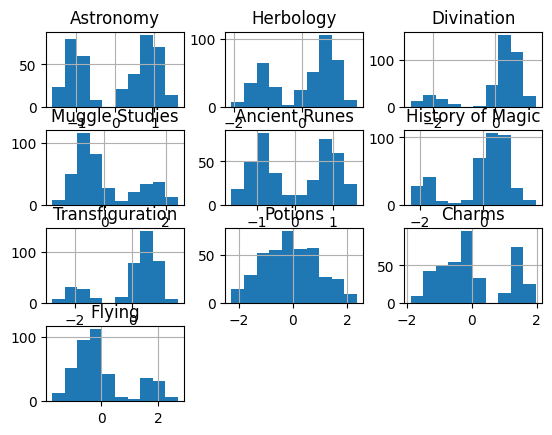

In [209]:
# Check the distribution
df_test_clean_norm.hist()

### Save the cleaned Dataset 

In [210]:
import os
os.makedirs('../datasets/clean', exist_ok=True)
df_test_clean_norm.to_csv('../datasets/clean/cleaned_test.csv', index=False)